# **Проект визуализации данных с использованием Seaborn**

В этом проекте мы выполняем **визуализацию данных** с использованием библиотеки **Seaborn** для статистической графики. Цель состоит в создании различных графиков, включая **линейные графики, столбчатые диаграммы, точечные диаграммы и гистограммы** для анализа продаж продуктов и тенденций доходов.

---

## **Инструкции по проекту**

1. **Линейный график временных рядов**: Анализируйте тенденции в `Car_Sales` и `Computer_Sales` с течением времени, чтобы понять модели продаж.
2. **Сравнение столбчатых диаграмм**: Сравните `Car_Sales` и `Computer_Sales` в разные даты.
3. **Анализ точечной диаграммы**: Визуализируйте взаимосвязь между `Car_Sales` и `Revenue`.
4. **Распределение гистограммы**: Изучите распределение **значений продаж** для `Car` и `Computer`.
---
### **Создание DataFrame**

Следующий код генерирует случайный набор данных, содержащий продажи продуктов и доходы. Этот шаг предоставлен и не требует реализации в рамках задач.



In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_sample_data():
    """
    Генерация случайного набора данных, содержащего продажи продуктов и доходы.
    """
    np.random.seed(42)
    dates = pd.date_range(start="2023-01-01", periods=15, freq='D')
    car_sales = np.random.randint(100, 300, size=15)
    computer_sales = np.random.randint(150, 350, size=15)
    revenue = np.random.randint(5000, 15000, size=15)
    
    df = pd.DataFrame({
        "Date": dates,
        "Car_Sales": car_sales,
        "Computer_Sales": computer_sales,
        "Revenue": revenue
    })
    df.set_index("Date", inplace=True)
    return df

df = create_sample_data()


---
## **Реализация**

### **1. Линейный график временных рядов**

**Анализ:** Как различаются тенденции продаж между автомобилями и компьютерами? Есть ли сезонные пики или спады? Эта визуализация помогает бизнесу понять колебания спроса и соответственно корректировать маркетинговые или складские стратегии. 

**Ожидаемый результат:**

![Линейный график временных рядов](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/seaborn_visualization/1.png)



In [10]:
# Генерация набора данных
df = create_sample_data()
print(df.head())

            Car_Sales  Computer_Sales  Revenue
Date                                          
2023-01-01        202             301    11396
2023-01-02        279             280    13666
2023-01-03        192             299    14274
2023-01-04        114             202     7558
2023-01-05        206             151    12849


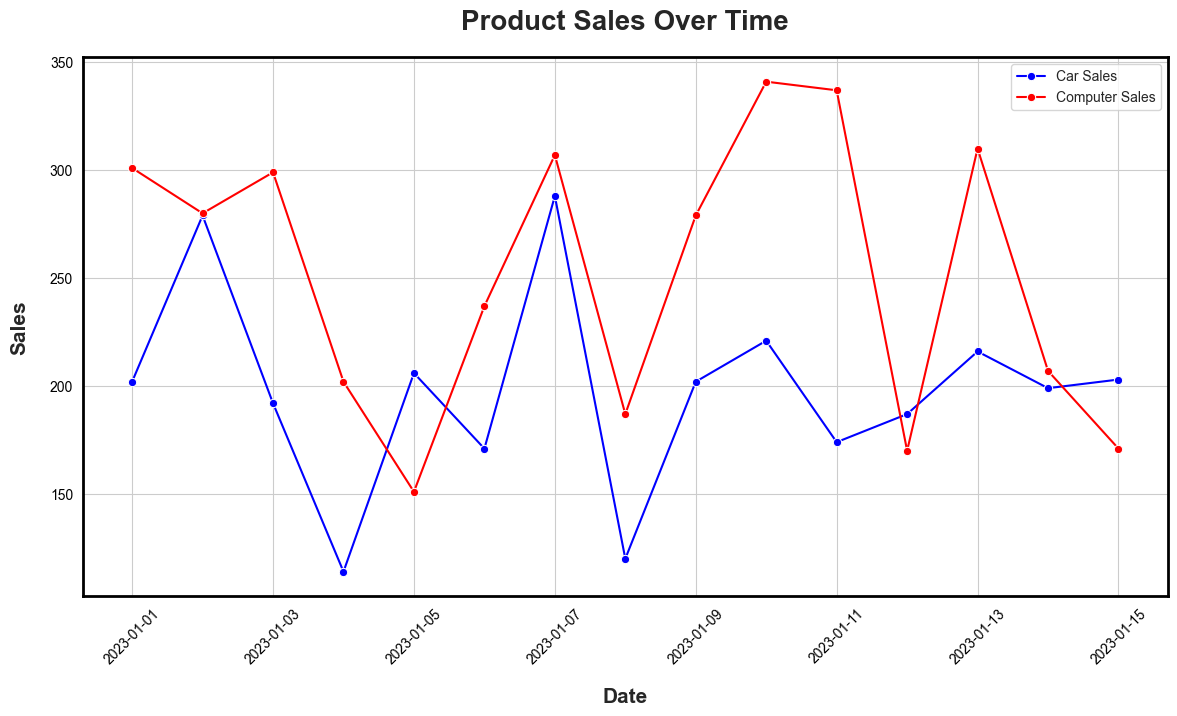

In [24]:
# Построение линейного графика временных рядов для продаж автомобилей и компьютеров.
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.lineplot(x=df.index, y=df['Car_Sales'], label='Car Sales', marker='o', color='b')
sns.lineplot(x=df.index, y=df['Computer_Sales'], label='Computer Sales', marker='o', color='r')
# Настройка рамки графика (черный цвет)
plt.gca().spines['top'].set_linewidth(2)  # Устанавливаем толщину верхней границы
plt.gca().spines['top'].set_edgecolor('black')  # Цвет верхней границы
plt.gca().spines['right'].set_linewidth(2)  # Устанавливаем толщину правой границы
plt.gca().spines['right'].set_edgecolor('black')  # Цвет правой границы
plt.gca().spines['left'].set_linewidth(2)  # Устанавливаем толщину левой границы
plt.gca().spines['left'].set_edgecolor('black')  # Цвет левой границы
plt.gca().spines['bottom'].set_linewidth(2)  # Устанавливаем толщину нижней границы
plt.gca().spines['bottom'].set_edgecolor('black')  # Цвет нижней границы
# Добавление заголовка и подписей к осям
plt.title("Product Sales Over Time", size=20, pad=20, weight='bold')
plt.xlabel("Date", size=15, labelpad=15, weight='bold')
plt.xticks(rotation=45)
plt.ylabel("Sales", size=15, labelpad=15, weight='bold')
# Изменение цвета индексов на осях на черный
plt.tick_params(axis='x', colors='black')  # Цвет индексов по оси X
plt.tick_params(axis='y', colors='black')  # Цвет индексов по оси Y



### **2. Сравнение столбчатых диаграмм**

**Анализ:** Какой продукт лучше продается с течением времени? Один продукт постоянно превосходит другой по продажам? Эта столбчатая диаграмма позволяет бизнесу выявлять пробелы в производительности и корректировать стратегии продаж. 

**Ожидаемый результат:**

![Сравнение столбчатых диаграмм](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/seaborn_visualization/2.png)



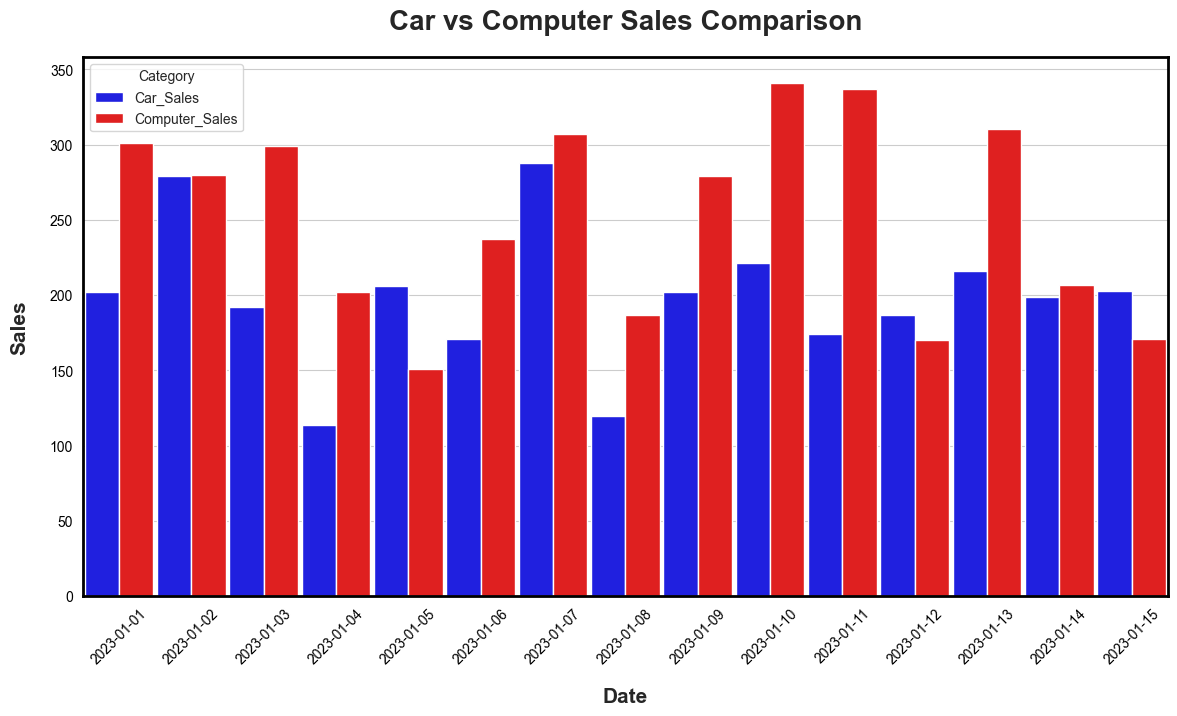

In [80]:
# Построение столбчатой диаграммы для сравнения продаж автомобилей и компьютеров.
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
df_melted = df.reset_index().melt(id_vars='Date', value_vars=['Car_Sales', 'Computer_Sales'], var_name='Category', value_name='Sales')
sns.barplot(x='Date', y='Sales', hue='Category', data=df_melted, palette=['b', 'r'],width=0.95)

# Настройка рамки графика (черный цвет)
plt.gca().spines['top'].set_linewidth(2)  # Устанавливаем толщину верхней границы
plt.gca().spines['top'].set_edgecolor('black')  # Цвет верхней границы
plt.gca().spines['right'].set_linewidth(2)  # Устанавливаем толщину правой границы
plt.gca().spines['right'].set_edgecolor('black')  # Цвет правой границы
plt.gca().spines['left'].set_linewidth(2)  # Устанавливаем толщину левой границы
plt.gca().spines['left'].set_edgecolor('black')  # Цвет левой границы
plt.gca().spines['bottom'].set_linewidth(2)  # Устанавливаем толщину нижней границы
plt.gca().spines['bottom'].set_edgecolor('black')  # Цвет нижней границы
# Добавление заголовка и подписей к осям
plt.title("Car vs Computer Sales Comparison", size=20, pad=20, weight='bold')
plt.xlabel("Date", size=15, labelpad=15, weight='bold')
plt.xticks(rotation=45)
plt.ylabel("Sales", size=15, labelpad=15, weight='bold')
# Изменение цвета индексов на осях на черный
plt.tick_params(axis='x', colors='black')  # Цвет индексов по оси X
plt.tick_params(axis='y', colors='black')  # Цвет индексов по оси Y




### **3. Анализ точечной диаграммы**

**Анализ:** Существует ли прямая корреляция между продажами автомобилей и доходами? Если более высокие продажи постоянно приводят к более высоким доходам, бизнес может сосредоточиться на увеличении объема продаж для максимизации прибыли. **Ожидаемый результат:**

![Анализ точечной диаграммы](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/seaborn_visualization/3.png)



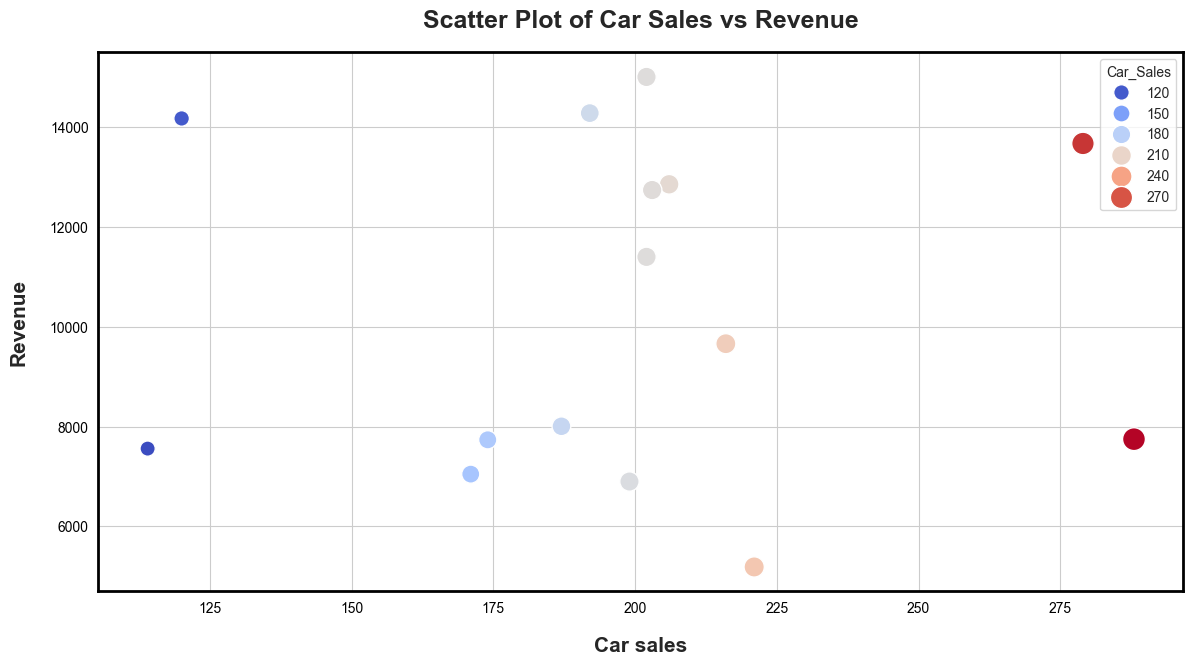

In [70]:
# Построение точечной диаграммы для визуализации взаимосвязи между продажами автомобилей и доходами.
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.scatterplot(x=df['Car_Sales'], y=df['Revenue'], palette='coolwarm', data=df,hue='Car_Sales', size='Car_Sales', sizes=(120,270))
# Настройка рамки графика (черный цвет)
plt.gca().spines['top'].set_linewidth(2)  # Устанавливаем толщину верхней границы
plt.gca().spines['top'].set_edgecolor('black')  # Цвет верхней границы
plt.gca().spines['right'].set_linewidth(2)  # Устанавливаем толщину правой границы
plt.gca().spines['right'].set_edgecolor('black')  # Цвет правой границы
plt.gca().spines['left'].set_linewidth(2)  # Устанавливаем толщину левой границы
plt.gca().spines['left'].set_edgecolor('black')  # Цвет левой границы
plt.gca().spines['bottom'].set_linewidth(2)  # Устанавливаем толщину нижней границы
plt.gca().spines['bottom'].set_edgecolor('black')  # Цвет нижней границы
# Добавление заголовка и подписей к осям
plt.title("Scatter Plot of Car Sales vs Revenue", size=18, pad=18, weight='bold')
plt.xlabel("Car sales", size=15, labelpad=15, weight='bold')
plt.ylabel("Revenue", size=15, labelpad=15, weight='bold')
# Изменение цвета индексов на осях на черный
plt.tick_params(axis='x', colors='black')  # Цвет индексов по оси X
plt.tick_params(axis='y', colors='black')  # Цвет индексов по оси Y


### **4. Распределение гистограммы**

**Анализ:** Каков наиболее распространенный диапазон продаж для каждого продукта? Есть ли значительные выбросы? Понимание распределения помогает бизнесу оптимизировать ценообразование, акции и уровни запасов. 

**Ожидаемый результат:**

![Распределение гистограммы](https://habsida-datascience.s3.ap-northeast-2.amazonaws.com/assets/chapter_3/seaborn_visualization/4.png)



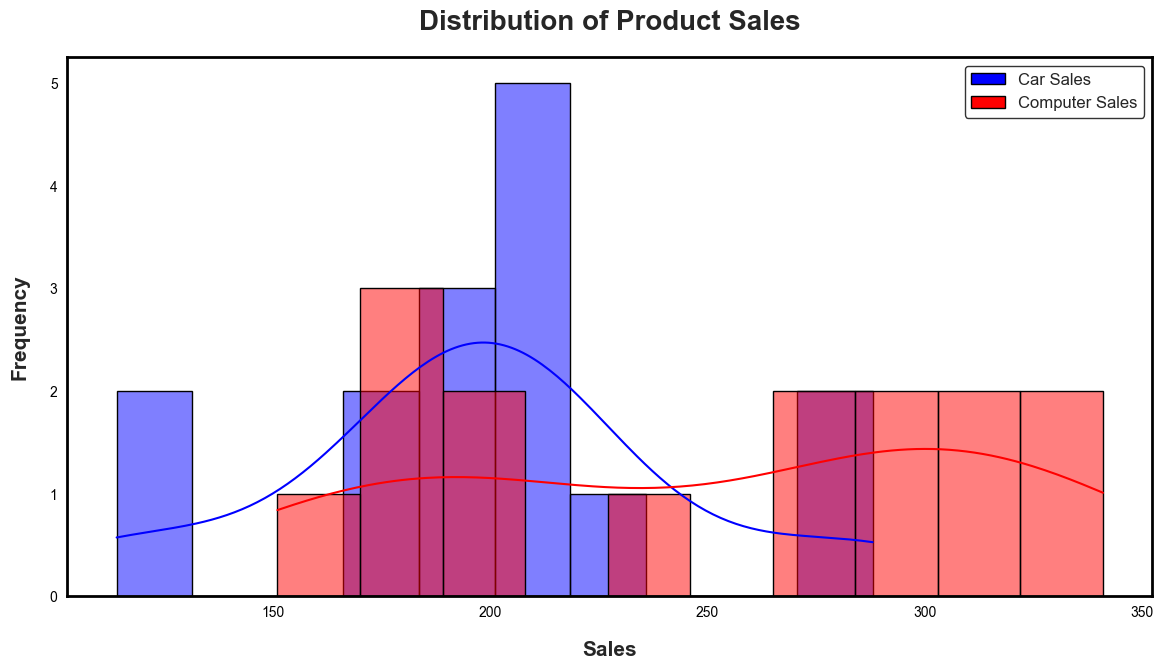

In [108]:
from matplotlib.patches import Rectangle
# Построение гистограммы для визуализации распределения продаж автомобилей и компьютеров.
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.histplot(df['Car_Sales'], kde=True, color='b', bins=10,edgecolor='black')
sns.histplot(df['Computer_Sales'], kde=True, color='r', bins=10, edgecolor='black')
# Настройка рамки графика (черный цвет)
plt.gca().spines['top'].set_linewidth(2)  # Устанавливаем толщину верхней границы
plt.gca().spines['top'].set_edgecolor('black')  # Цвет верхней границы
plt.gca().spines['right'].set_linewidth(2)  # Устанавливаем толщину правой границы
plt.gca().spines['right'].set_edgecolor('black')  # Цвет правой границы
plt.gca().spines['left'].set_linewidth(2)  # Устанавливаем толщину левой границы
plt.gca().spines['left'].set_edgecolor('black')  # Цвет левой границы
plt.gca().spines['bottom'].set_linewidth(2)  # Устанавливаем толщину нижней границы
plt.gca().spines['bottom'].set_edgecolor('black')  # Цвет нижней границы
# Добавление заголовка и подписей к осям
plt.title("Distribution of Product Sales", size=20, pad=20, weight='bold')
plt.xlabel("Sales", size=15, labelpad=15, weight='bold')
plt.ylabel("Frequency", size=15, labelpad=15, weight='bold')
# Изменение цвета индексов на осях на черный
plt.tick_params(axis='x', colors='black')  # Цвет индексов по оси X
plt.tick_params(axis='y', colors='black')  # Цвет индексов по оси Y
plt.grid(False)  # Убираем сетку с графика

# Определение прямоугольников для легенды
car_rectangle = Rectangle((0, 0), 1, 1, fc='b', edgecolor='black')
computer_rectangle = Rectangle((0, 0), 1, 1, fc='r', edgecolor='black')

plt.legend(
    handles=[car_rectangle, computer_rectangle],
    labels=['Car Sales', 'Computer Sales'],
    title_fontsize='13',  # Размер шрифта для заголовка легенды
    fontsize='12',  # Размер шрифта для надписей легенды
    frameon=True,  # Включаем рамку
    edgecolor='black',  # Цвет рамки
    facecolor='white'  # Цвет фона легенды
)


---
### Как отправить проект

1. Создайте файл Jupyter Notebook на вашем Google Диске.
2. Напишите ваше решение в блокноте.
3. Поделитесь доступом с вашим наставником (или предоставьте ссылку с правами на редактирование).
4. Отправьте ссылку на файл блокнота.


## **Резюме**
Этот проект улучшает навыки работы с **Seaborn** в **визуализации данных**, предлагая понимание тенденций продаж продуктов и распределения доходов. Это позволяет бизнесу понять ключевые показатели эффективности, оптимизировать стратегии продаж и принимать решения на основе данных.